## Analysis of Yelp Business Intelligence Data

## Part I: Installation and Initial Setup

#### Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

In [2]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.11.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1651318430173_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/d9cfb4410589805cd787f8a82cddd13142d9bf7449d12adf2d05a4a7d633/pyparsing-3.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/75/e1/932e06004039dd670c9d5e1df0cd606bf46e29a28e65d5bb28e894ea29c9/typing_extensions-4.2.0-py3-none-any.whl

## Importing

#### Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pyspark.sql.functions import col

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Part II: Analyzing Categories

### Loading Data
#### We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [4]:
#Loading the dataset
df_business = spark.read.json('s3://cis9760-yelpdata/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df_business.printSchema()
df_business.show(10)
df_business.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

## Overview of Data

#### Display the number of rows and columns in our dataset.

In [6]:
print("Number of columns in Business table: ", str(len(df_business.columns)))
print("Number of rows in Business table: ",str(df_business.count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table:  14
Number of rows in Business table:  150346

#### Display the DataFrame schema below.

In [7]:
df_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

#### Display the first 5 rows with the following columns:
•	business_id

•	name

•	city

•	state

•	categories 

In [8]:
#print(df_business.show(5))
df_business.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+
|         business_id|                name|         city|state|          categories|
+--------------------+--------------------+-------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|   CA|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|   MO|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|              Target|       Tucson|   AZ|Department Stores...|
|MTSW4McQd7CbVtyjq...|  St Honore Pastries| Philadelphia|   PA|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Perkiomen Valley ...|   Green Lane|   PA|Brewpubs, Breweri...|
+--------------------+--------------------+-------------+-----+--------------------+
only showing top 5 rows

## Analyzing Categories

In [9]:
df_business.select("business_id", "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|Department Stores...|
|MTSW4McQd7CbVtyjq...|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Brewpubs, Breweri...|
+--------------------+--------------------+
only showing top 5 rows

#### Display the first 5 rows of your association table below.

In [10]:
from pyspark.sql.functions import explode, split
df_business_cat = df_business.withColumn('category',explode(split('categories',", ")))
df_business_cat.select("business_id", "category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|            category|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|             Doctors|
|Pns2l4eNsfO8kk83d...|Traditional Chine...|
|Pns2l4eNsfO8kk83d...|Naturopathic/Holi...|
|Pns2l4eNsfO8kk83d...|         Acupuncture|
|Pns2l4eNsfO8kk83d...|    Health & Medical|
+--------------------+--------------------+
only showing top 5 rows

## Total Unique Categories

#### what is the total number of unique categories available?
#### Below, implement the code necessary to calculate this figure.

In [11]:
from pyspark.sql.functions import countDistinct
df_business_cat.select(countDistinct("category")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+
|count(DISTINCT category)|
+------------------------+
|                    1311|
+------------------------+

## Top Categories By Business

### Counts of Businesses / Category

In [12]:
df_business_cat \
    .groupBy(df_business_cat.category) \
    .count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  336|
|      Paddleboarding|   98|
|        Aerial Tours|   12|
|Faith-based Crisi...|    1|
|         Hobby Shops|  552|
|          Bubble Tea|  477|
|            Handyman|  356|
|             Tanning|  667|
|      Aerial Fitness|   19|
|             Falafel|  103|
|        Summer Camps|  232|
|       Outlet Stores|  182|
|     Clothing Rental|   37|
|      Sporting Goods| 1662|
|     Cooking Schools|   76|
|  Lactation Services|   27|
|Ski & Snowboard S...|   40|
|             Museums|  413|
|              Doulas|   31|
|     Baseball Fields|   14|
+--------------------+-----+
only showing top 20 rows

## Bar Chart of Top Categories

In [13]:

df_topcat = df_business_cat \
            .groupBy(df_business_cat.category) \
            .count() \
            .sort(col("count").desc()).limit(20)
df_topcat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+

In [14]:
df_topcat = df_topcat.toPandas()
df_topcat

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     category  count
0                 Restaurants  52268
1                        Food  27781
2                    Shopping  24395
3               Home Services  14356
4               Beauty & Spas  14292
5                   Nightlife  12281
6            Health & Medical  11890
7              Local Services  11198
8                        Bars  11065
9                  Automotive  10773
10  Event Planning & Services   9895
11                 Sandwiches   8366
12     American (Traditional)   8139
13                Active Life   7687
14                      Pizza   7093
15               Coffee & Tea   6703
16                  Fast Food   6472
17         Breakfast & Brunch   6239
18             American (New)   6097
19            Hotels & Travel   5857

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

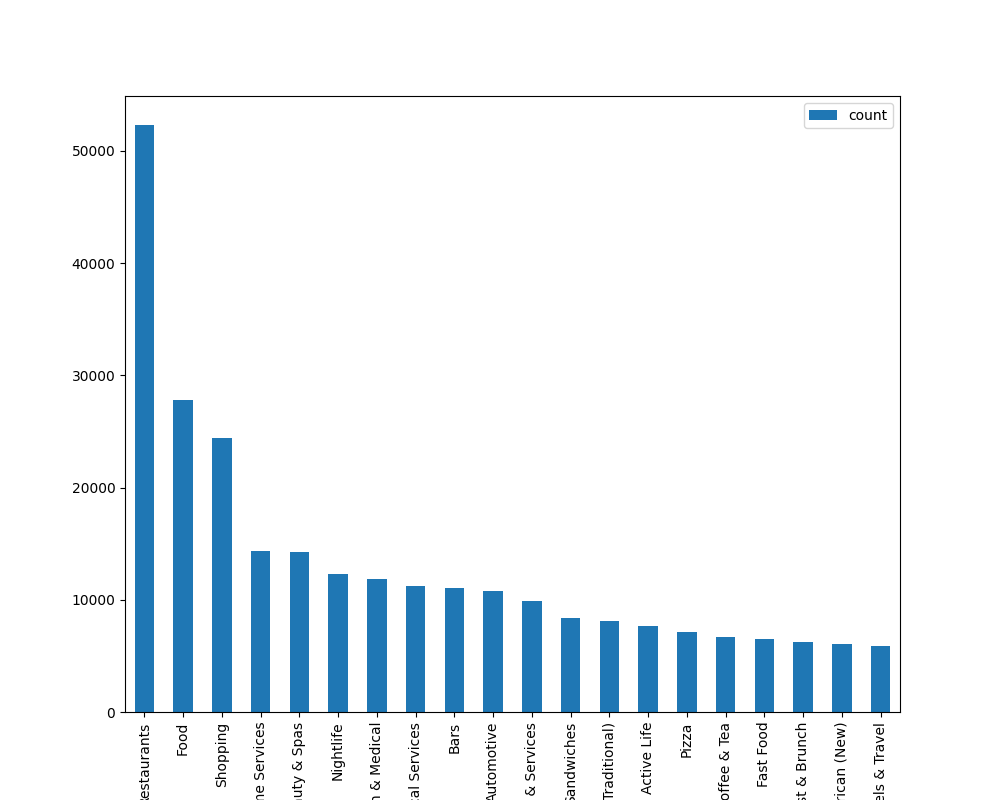

In [15]:
plt.figure(figsize =(10,8))
df_topcat.plot(kind='bar', x='category', figsize=(10,8), rot=90)
%matplot plt

## Part III: Do Yelp Reviews Skew Negative?

### Loading User Data

In [16]:
df_review = spark.read.json('s3://cis9760-yelpdata/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df_review.printSchema()
df_review.show(10)
df_review.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPp

#### Let's begin by listing the business_id and stars columns together for the user reviews data.

In [18]:
df_review.select('business_id', 'stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|
|7ATYjTIgM3jUlt4UM...|  5.0|
|YjUWPpI6HXG530lwP...|  3.0|
|kxX2SOes4o-D3ZQBk...|  5.0|
|e4Vwtrqf-wpJfwesg...|  4.0|
+--------------------+-----+
only showing top 5 rows

#### Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.

In [19]:
#from pyspark.sql.functions import col
#nll = '\\N'
#df_txt_review = df_review.filter(col("startYear") != nll)
    #.filter(df_review.titleType == "movie") \
df_review_avg = df_review \
    .groupBy('business_id') \
    .avg('stars')
df_review_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|HSzSGdcNaU7heQe0N...|3.3333333333333335|
|skW4boArIApRw9DXK...|2.3947368421052633|
|zJErbOQMKX-MwHs_u...|2.9279279279279278|
|I0053JmJ5DEFUWSJ8...|2.3956043956043955|
|wS-SWAa_yaJAw6fJm...| 3.357142857142857|
+--------------------+------------------+
only showing top 5 rows

#### Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [20]:
df_bus_review = df_business.join(df_review_avg, ['business_id'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
df_bus_review.select('name', 'city', 'state', 'avg(stars)', 'stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+
|                name|        city|state|        avg(stars)|stars|
+--------------------+------------+-----+------------------+-----+
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|
|  NJ Weedman's Joint|     Trenton|   NJ| 4.232558139534884|  4.0|
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|
|       A Able Movers|      Tucson|   AZ|             1.875|  2.0|
+--------------------+------------+-----+------------------+-----+
only showing top 5 rows

In [22]:
df_busreview_skew = df_bus_review.withColumn('skew', ((df_bus_review['avg(stars)'] - df_bus_review['stars']) / df_bus_review['stars']))
df_busreview_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+-----------------+--------------------+
|         business_id|             address|          attributes|          categories|        city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|       avg(stars)|                skew|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+-----------------+--------------------+
|--gJkxbsiSIwsQKbi...| 4545 W Kennedy Blvd|[,,,,,,, True, Fa...|Skin Care, Hair S...|       Tampa|[8:0-20:0, 8:0-20...|      1|   27.9451223|    -82.5210814|Salon Lofts - Wes...|      33609|           6|  5.0|   FL|4.833333333333333|-0

In [23]:
df_busreview_skew.select('name', 'city', 'state', 'avg(stars)', 'stars', 'skew').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+--------------------+
|                name|        city|state|        avg(stars)|stars|                skew|
+--------------------+------------+-----+------------------+-----+--------------------+
|Gillane's Bar & G...|     Ardmore|   PA|3.3333333333333335|  3.0| 0.11111111111111116|
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|-0.04210526315789469|
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|-0.02402402402402...|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|-0.04175824175824179|
|  Swiss Watch Center|       Tampa|   FL| 3.357142857142857|  3.5|-0.04081632653061223|
+--------------------+------------+-----+------------------+-----+--------------------+
only showing top 5 rows

#### And finally, graph it!

In [24]:
df_busreview_skew = df_busreview_skew.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

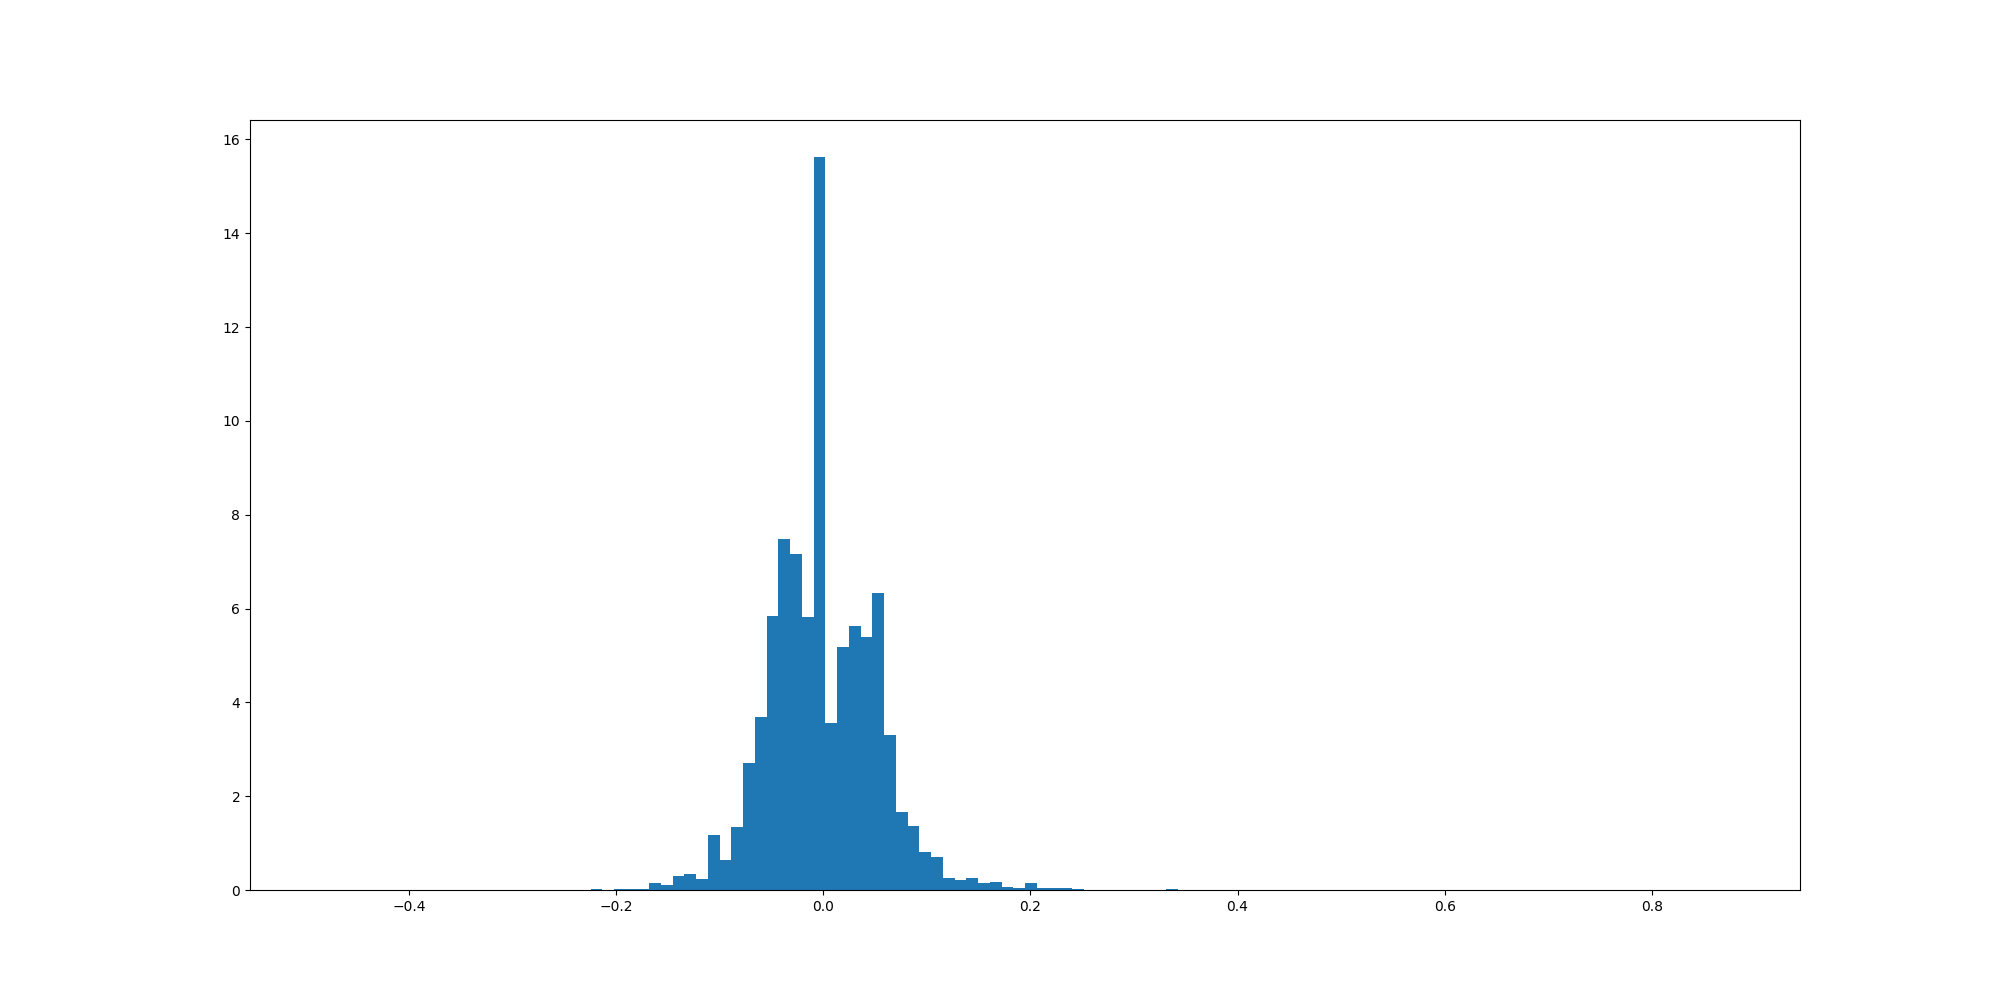

In [25]:
plt.figure(figsize=(20,10))
plt.hist(df_busreview_skew['skew'],bins=120,density=True)
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

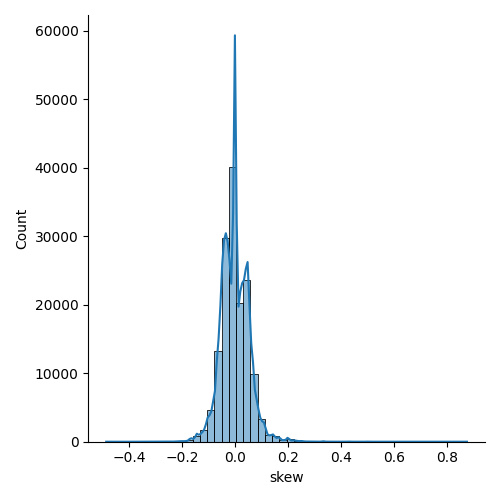

In [26]:
X = df_busreview_skew['skew']
sns.displot(X, kde=True, bins=50)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

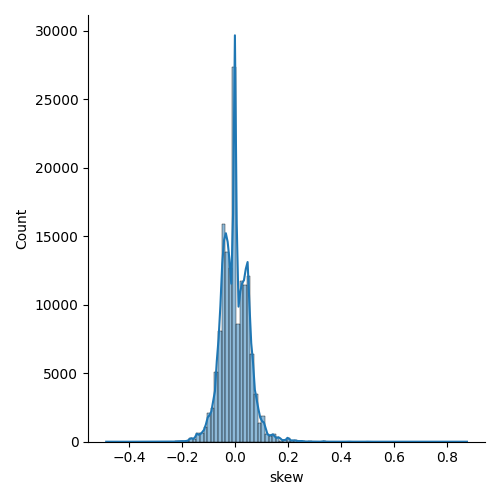

In [27]:
X = df_busreview_skew['skew']
sns.displot(X, kde=True, bins=100)
%matplot plt

In [ ]:
#sns.distplot(X)
#%matplot plt

In [29]:
df_busreview_skew.describe()['skew']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

count    150346.000000
mean         -0.000075
std           0.053311
min          -0.485294
25%          -0.035714
50%           0.000000
75%           0.034483
max           0.875000
Name: skew, dtype: float64

## IMPLICATIONS

The density plot obtained of the skew column seems to be evenly distributed to the naked eye.
To check if there is actually any skweness in the data, I changed the bin values to 70, 90, 100, 150 etc.
From the graph we cannot conclude anything which way it is skewed.

As we know that -
If a density curve is left skewed, then the mean is less than the median.
If a density curve is right skewed, then the mean is greater than the median.
If a density curve has no skew, then the mean is equal to the median.

The descriptive stats of skew column are as below -
mean is -0.000075
median is 0.000000
As per these values we can say that the density curve is left skewed by a very small margin.

We can conlcude that there is not much significant difference in the level of satisfaction between users who wrote a written review vs the ones who just gave the star rating.

## Should the Elite be Trusted?

In [30]:
df_user = spark.read.json('s3://cis9760-yelpdata/yelp_academic_dataset_user.json')
df_user.printSchema()
df_user.show(10)
df_user.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

+-------------+---------------+---------------+----------------+-----

In [31]:
#df_user.select(col('elite')).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
bus_only = df_business.select("business_id", col("stars").alias("bus_stars"))
review_only = df_review.select("business_id", "stars", "user_id")
user_only = df_user.select("elite", "user_id")


bus_review = bus_only.join(review_only, ['business_id'])
bus_review_user = bus_review.join(user_only, ['user_id'])
bus_review_user.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+-----+
|             user_id|         business_id|bus_stars|stars|elite|
+--------------------+--------------------+---------+-----+-----+
|--3Hl2oAvTPlq-f7K...|h0wHeh0hTt6Us4W-1...|      4.0|  5.0|     |
|--3Hl2oAvTPlq-f7K...|BD1FU6xsYPtbQZ8pX...|      4.0|  2.0|     |
|--3Hl2oAvTPlq-f7K...|hodLyDkWXAosXLSTK...|      4.5|  5.0|     |
|--6lqYpHZCBbpW5z2...|mUI4DJagyUyu76qnR...|      3.0|  1.0|     |
|--ChzqcPs4YFWlw1j...|CkENBnSJFfPA1hY0q...|      3.5|  2.0|     |
|--N8bMebkrhJuFYkO...|WO-ofNAvSuJpdRt9A...|      4.5|  5.0|     |
|--QuTu4oQehIyk8VC...|oJxsRgj8Un9VAPXpa...|      3.5|  2.0|     |
|--QuTu4oQehIyk8VC...|Uky0DD3LU4C7eyNDh...|      4.0|  5.0|     |
|--QuTu4oQehIyk8VC...|-KugJyLmuTECAE121...|      4.5|  5.0|     |
|--QuTu4oQehIyk8VC...|6pT7TIyrhpeo-LjTl...|      3.5|  5.0|     |
+--------------------+--------------------+---------+-----+-----+
only showing top 10 rows

In [33]:
bus_review_user.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6990247

In [34]:
from pyspark.sql.functions import col
nll = ''
bus_review_user_elite = bus_review_user.filter(col("elite") != nll)

bus_review_user_elite.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1725658

In [35]:
bus_review_user_elite.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+--------------------+
|             user_id|         business_id|bus_stars|stars|               elite|
+--------------------+--------------------+---------+-----+--------------------+
|IeSz60ozr1yAVIH8C...|TV81bpCQ6p6o4Hau5...|      4.5|  4.0|2017,2018,2019,20...|
|xW2A0MciHB0pLB4RH...|W4ZEKkva9HpAdZG88...|      4.0|  5.0|2014,2015,2016,20...|
|SSafXe2aUO0cXgQhE...|E-4t5Hoon6aVFTWDP...|      4.0|  5.0|2014,2015,2016,20...|
|yiYUEExKfZEv_T8CF...|_pbx96FZ3eHJw-V_R...|      2.5|  3.0|                2015|
|A3EiqW7_k00gvaiQi...|8uF-bhJFgT4Tn6DTb...|      4.5|  5.0|          2019,20,20|
|Zsucq1c-sjuGxs5jZ...|zaC6coZ5Gp8mLjeg7...|      4.5|  4.0|2011,2012,2013,20...|
|aX3vDE1UmbdrWeOsg...|EqEcDeXqIq1YwnzHg...|      4.5|  5.0|2018,2019,20,20,2021|
|aHiQYaTXrmQTeG610...|3w7NRntdQ9h0KwDsk...|      2.0|  4.0|2012,2013,2014,20...|
|g34Qcj06LmCDhKzks...|yE1raqkLX7OZsjmX3...|      4.0|  5.0|2017,2018,2019,20,20|
|yiYUEExKfZEv_T8CF...|EP2jFD

In [36]:
bus_review_user_elite_diff = bus_review_user_elite.withColumn('star_diff', (bus_review_user_elite['bus_stars'] - bus_review_user_elite['stars']))
bus_review_user_elite_diff.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+--------------------+---------+
|             user_id|         business_id|bus_stars|stars|               elite|star_diff|
+--------------------+--------------------+---------+-----+--------------------+---------+
|IeSz60ozr1yAVIH8C...|TV81bpCQ6p6o4Hau5...|      4.5|  4.0|2017,2018,2019,20...|      0.5|
|xW2A0MciHB0pLB4RH...|W4ZEKkva9HpAdZG88...|      4.0|  5.0|2014,2015,2016,20...|     -1.0|
|SSafXe2aUO0cXgQhE...|E-4t5Hoon6aVFTWDP...|      4.0|  5.0|2014,2015,2016,20...|     -1.0|
|yiYUEExKfZEv_T8CF...|_pbx96FZ3eHJw-V_R...|      2.5|  3.0|                2015|     -0.5|
|A3EiqW7_k00gvaiQi...|8uF-bhJFgT4Tn6DTb...|      4.5|  5.0|          2019,20,20|     -0.5|
+--------------------+--------------------+---------+-----+--------------------+---------+
only showing top 5 rows

In [37]:
bus_review_user_elite_diff = bus_review_user_elite_diff.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

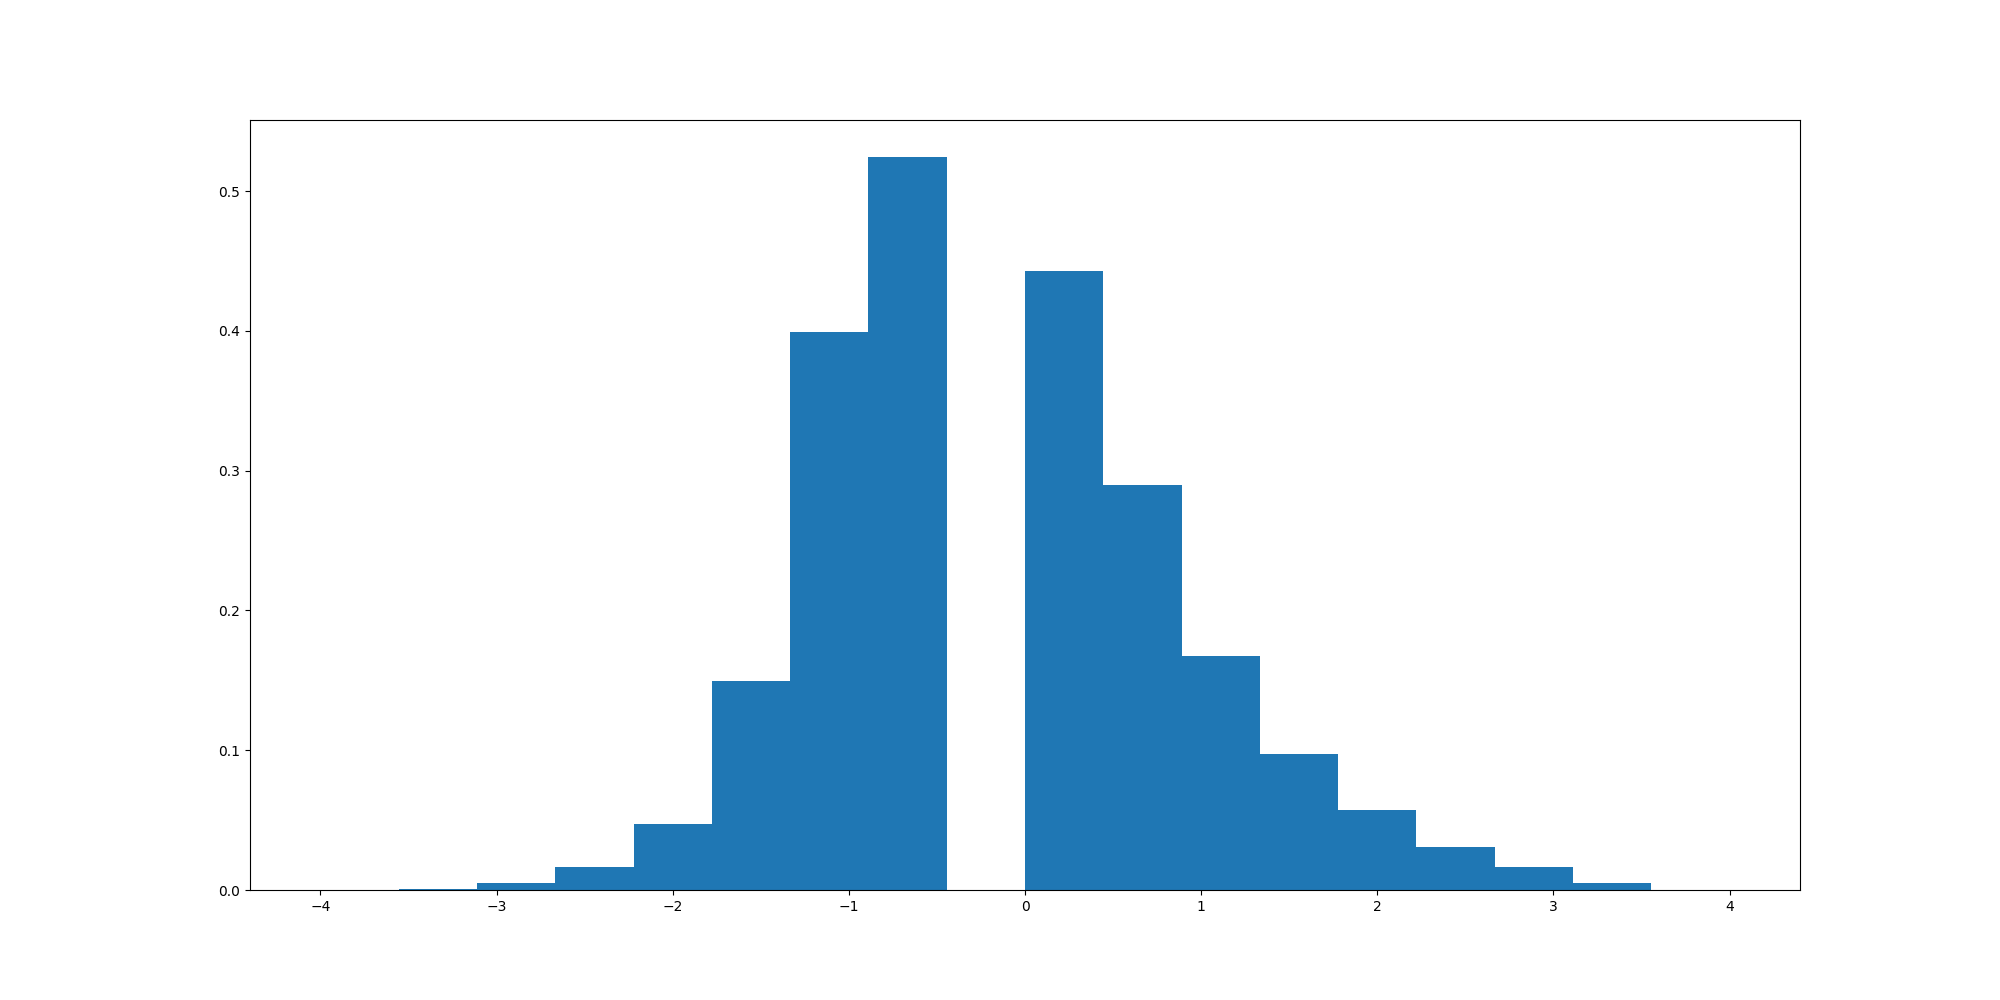

In [38]:
plt.figure(figsize=(20,10))
plt.hist(bus_review_user_elite_diff['star_diff'],bins=18,density=True)
plt.show()
%matplot plt

In [39]:
bus_review_user_notelite = bus_review_user.filter(col("elite") == nll)
bus_review_user_notelite.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

5264589

In [40]:
bus_review_user_notelite.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+-----+
|             user_id|         business_id|bus_stars|stars|elite|
+--------------------+--------------------+---------+-----+-----+
|--3Hl2oAvTPlq-f7K...|BD1FU6xsYPtbQZ8pX...|      4.0|  2.0|     |
|--3Hl2oAvTPlq-f7K...|hodLyDkWXAosXLSTK...|      4.5|  5.0|     |
|--3Hl2oAvTPlq-f7K...|h0wHeh0hTt6Us4W-1...|      4.0|  5.0|     |
|--6lqYpHZCBbpW5z2...|mUI4DJagyUyu76qnR...|      3.0|  1.0|     |
|--ChzqcPs4YFWlw1j...|CkENBnSJFfPA1hY0q...|      3.5|  2.0|     |
|--N8bMebkrhJuFYkO...|WO-ofNAvSuJpdRt9A...|      4.5|  5.0|     |
|--QuTu4oQehIyk8VC...|-KugJyLmuTECAE121...|      4.5|  5.0|     |
|--QuTu4oQehIyk8VC...|oJxsRgj8Un9VAPXpa...|      3.5|  2.0|     |
|--QuTu4oQehIyk8VC...|6pT7TIyrhpeo-LjTl...|      3.5|  5.0|     |
|--QuTu4oQehIyk8VC...|Uky0DD3LU4C7eyNDh...|      4.0|  5.0|     |
+--------------------+--------------------+---------+-----+-----+
only showing top 10 rows

In [41]:
bus_review_user_notelite_diff = bus_review_user_notelite.withColumn('star_diff', (bus_review_user_notelite['bus_stars'] - bus_review_user_notelite['stars']))
bus_review_user_notelite_diff.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+-----+---------+
|             user_id|         business_id|bus_stars|stars|elite|star_diff|
+--------------------+--------------------+---------+-----+-----+---------+
|--3Hl2oAvTPlq-f7K...|BD1FU6xsYPtbQZ8pX...|      4.0|  2.0|     |      2.0|
|--3Hl2oAvTPlq-f7K...|h0wHeh0hTt6Us4W-1...|      4.0|  5.0|     |     -1.0|
|--3Hl2oAvTPlq-f7K...|hodLyDkWXAosXLSTK...|      4.5|  5.0|     |     -0.5|
|--6lqYpHZCBbpW5z2...|mUI4DJagyUyu76qnR...|      3.0|  1.0|     |      2.0|
|--ChzqcPs4YFWlw1j...|CkENBnSJFfPA1hY0q...|      3.5|  2.0|     |      1.5|
+--------------------+--------------------+---------+-----+-----+---------+
only showing top 5 rows

In [42]:
bus_review_user_notelite_diff = bus_review_user_notelite_diff.drop("user_id","business_id","bus_stars","stars","elite")
bus_review_user_notelite_diff = bus_review_user_notelite_diff.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

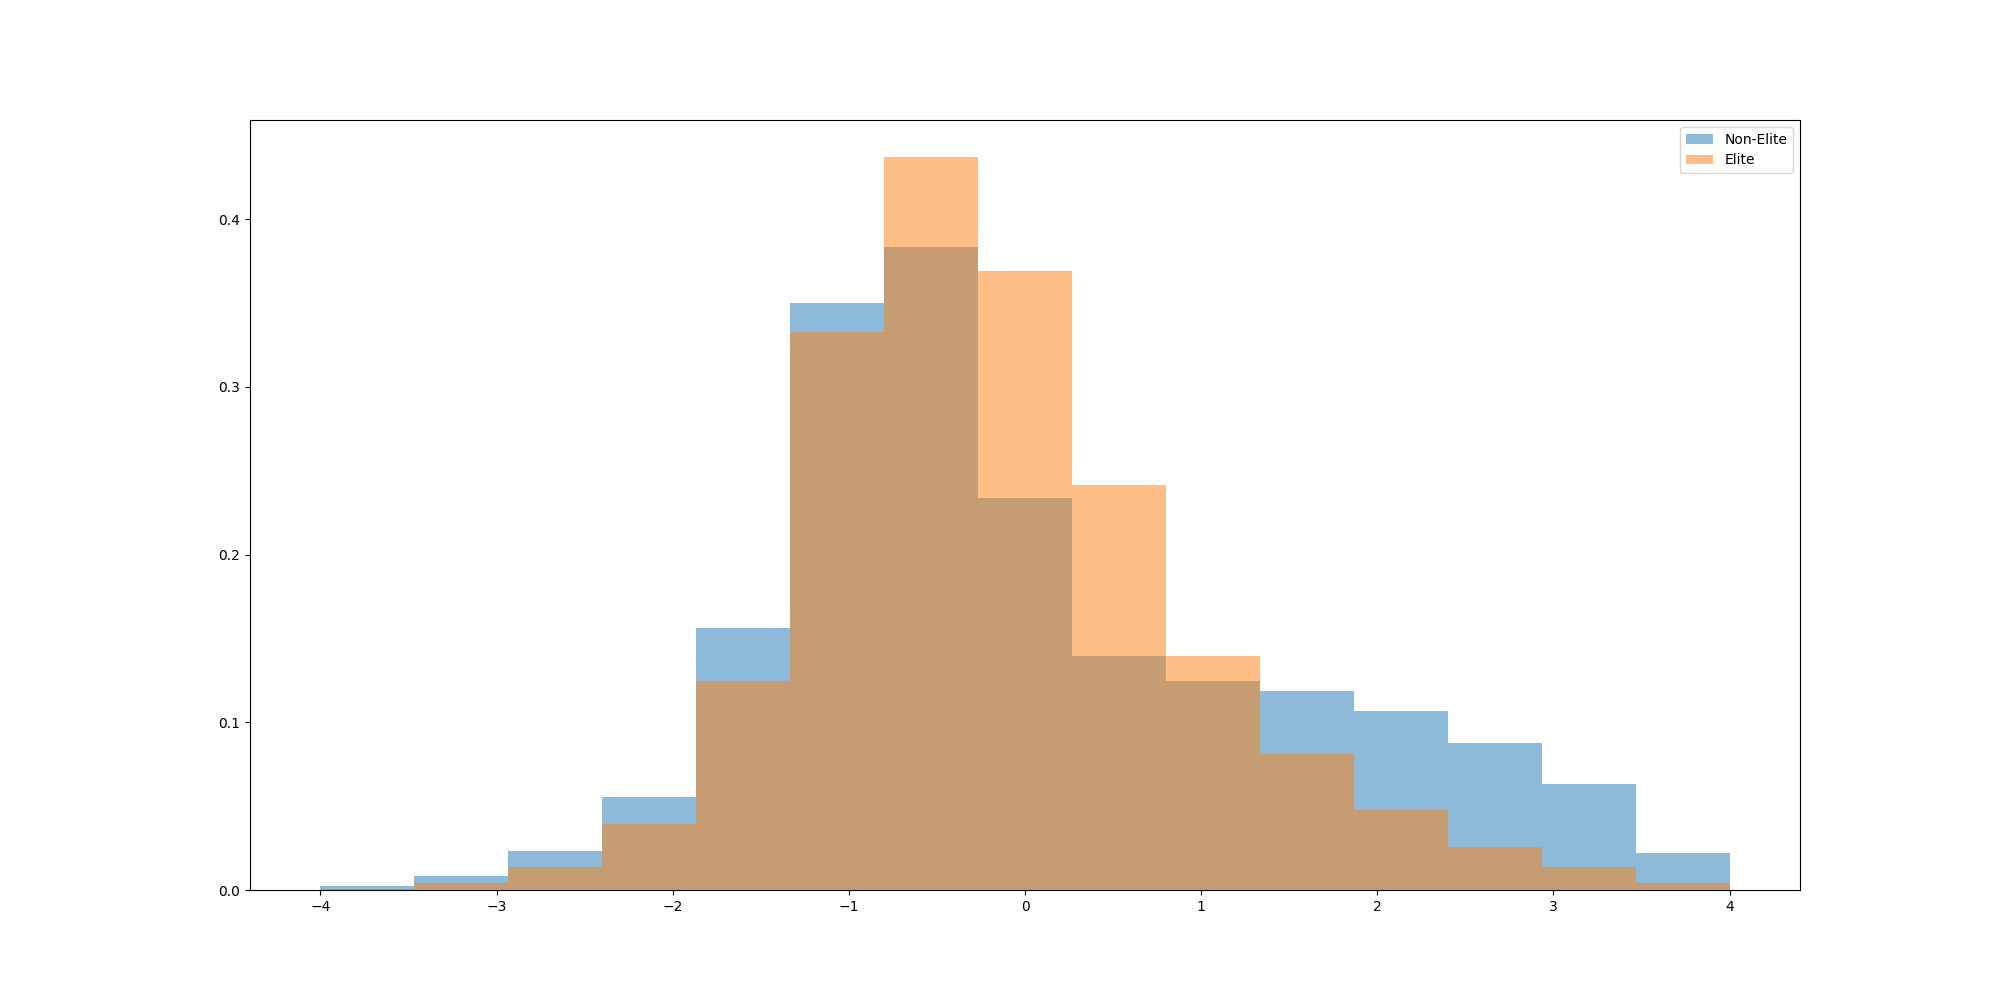

In [43]:
plt.figure(figsize=(20,10))
plt.hist(bus_review_user_notelite_diff['star_diff'],bins=15,density=True,alpha=0.5)
plt.hist(bus_review_user_elite_diff['star_diff'],bins=15,density=True,alpha=0.5)
plt.legend(["Non-Elite","Elite"])
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

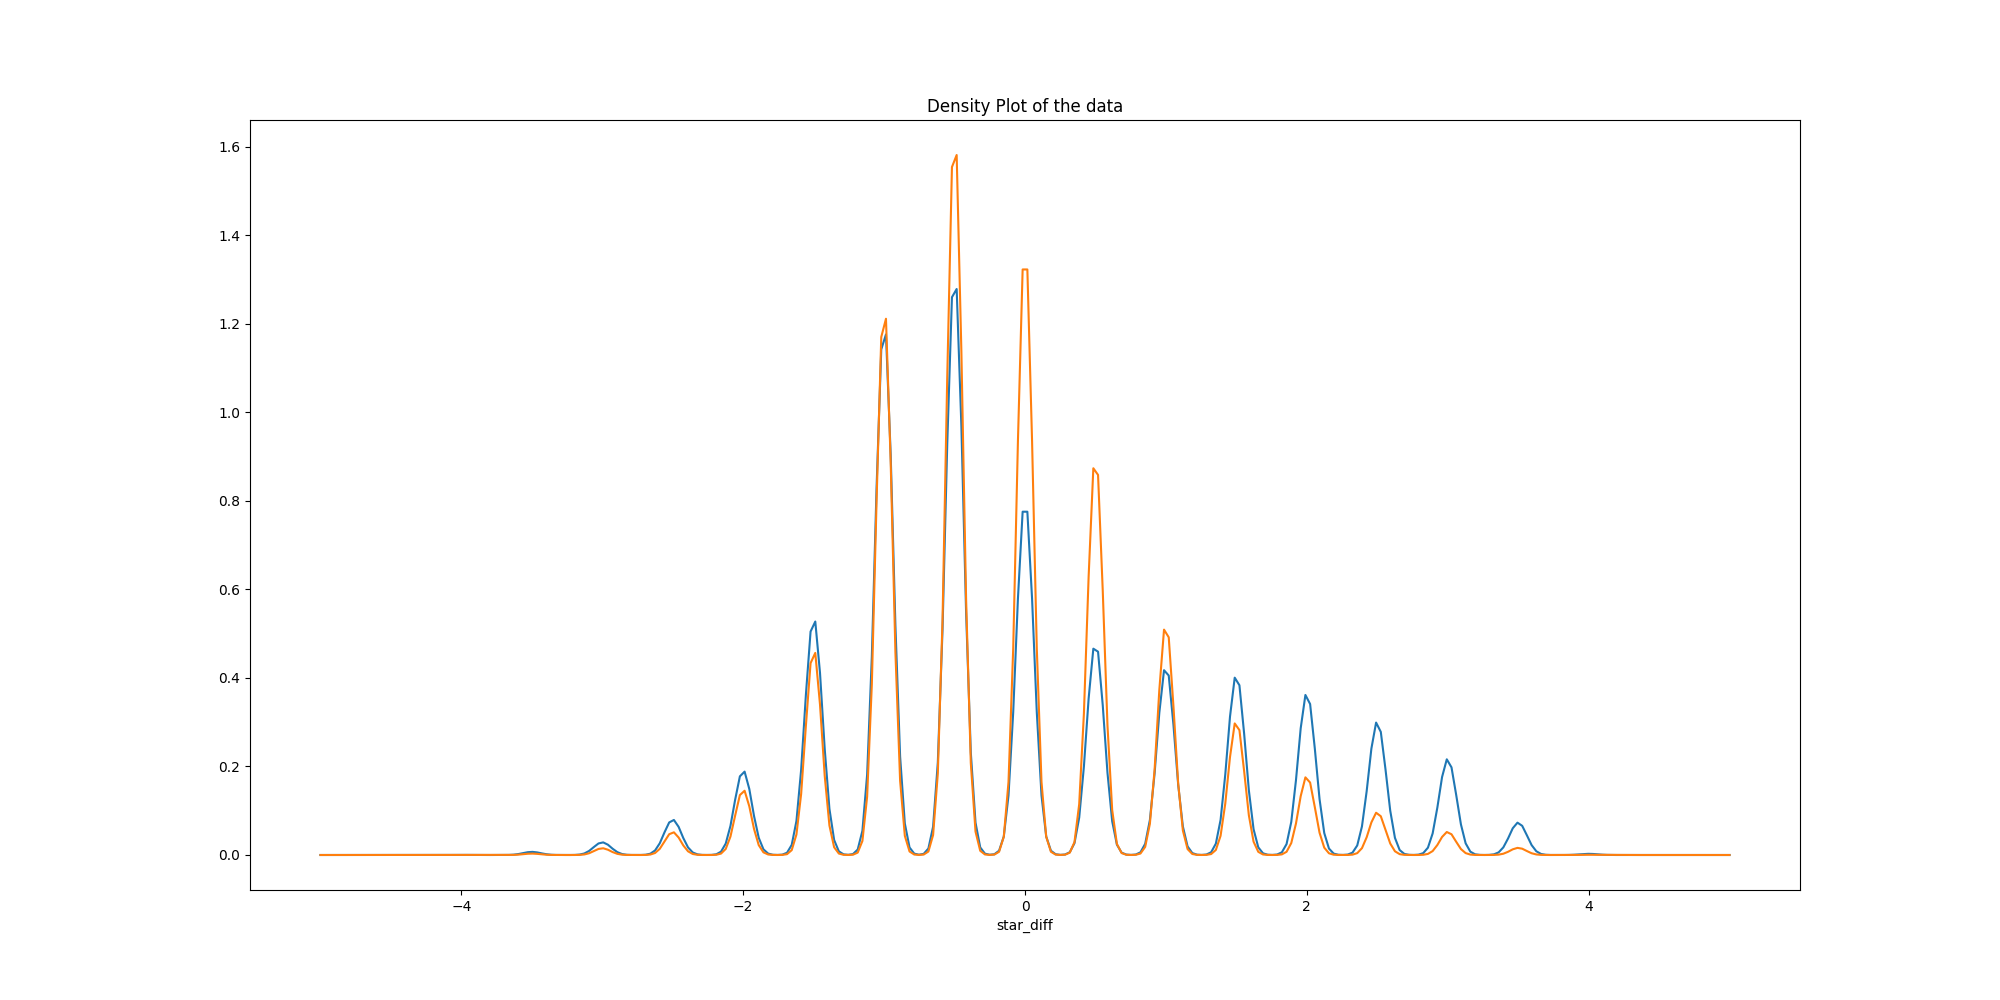

In [67]:
from scipy.stats import kde

data1 = bus_review_user_notelite_diff['star_diff']
density1 = kde.gaussian_kde(data1)
x1 = np.linspace(-5,5,300)
y1=density1(x1)

data2 = bus_review_user_elite_diff['star_diff']
density2 = kde.gaussian_kde(data2)
x2 = np.linspace(-5,5,300)
y2=density2(x2)

plt.figure(figsize=(20,10))
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("Density Plot of the data")
plt.xlabel("star_diff")
plt.show()
%matplot plt

In [45]:
bus_review_user_notelite_diff['star_diff'].describe()
bus_review_user_elite_diff['star_diff'].describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

count    1.725658e+06
mean    -1.425587e-01
std      1.003810e+00
min     -4.000000e+00
25%     -1.000000e+00
50%     -5.000000e-01
75%      5.000000e-01
max      4.000000e+00
Name: star_diff, dtype: float64

## Should the Elite be Trusted? - Analysis

The hist plot of the difference column from both elite and non elite customers seems to be slightly skewed.

As we know that - 

If a density curve is left skewed, then the mean is less than the median. 

If a density curve is right skewed, then the mean is greater than the median. 

If a density curve has no skew, then the mean is equal to the median.

The descriptive stats of difference column of notelite: 

mean --> 0.05037288, median --> -0.5000000

As per these values we can say that the density curve is right skewed.

The descriptive stats of difference column of elite: 

mean -->  -0.1425587, median --> -0.5000000 

As per these values we can say that the density curve is right skewed.

However, the if we look at the average rating difference values of elite and notelite groups. The notelite group is closer to zero, suggesting that their star ratings are closer to the actual business rating compared to the elite group.

Additionally, since the values are very small we cannot conclude if we can entirely trust or not trust the elite group. We can say that both the groups have fairly closer ratings to the actual business ratings.

## Extra Credit (3 points) - Popular users ratings vs Not Popular users ratings

### Joining the (only selected columns) three data frames on common columns

In [46]:
bus_only = df_business.select("business_id", col("stars").alias("bus_stars"), "state", "city")
review_only = df_review.select("business_id", "stars", "user_id")
user_only = df_user.select("average_stars", "fans", "review_count", "useful", "user_id")


bus_review = bus_only.join(review_only, ['business_id'])
bus_review_user = bus_review.join(user_only, ['user_id'])
bus_review_user.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+-----+-------------+-----+-------------+----+------------+------+
|             user_id|         business_id|bus_stars|state|         city|stars|average_stars|fans|review_count|useful|
+--------------------+--------------------+---------+-----+-------------+-----+-------------+----+------------+------+
|--3Hl2oAvTPlq-f7K...|h0wHeh0hTt6Us4W-1...|      4.0|   NV|         Reno|  5.0|         2.73|   0|          11|    14|
|--3Hl2oAvTPlq-f7K...|hodLyDkWXAosXLSTK...|      4.5|   NV|       Sparks|  5.0|         2.73|   0|          11|    14|
|--3Hl2oAvTPlq-f7K...|BD1FU6xsYPtbQZ8pX...|      4.0|   NV|         Reno|  2.0|         2.73|   0|          11|    14|
|--6lqYpHZCBbpW5z2...|mUI4DJagyUyu76qnR...|      3.0|   FL|        Tampa|  1.0|         3.27|   0|           9|     5|
|--ChzqcPs4YFWlw1j...|CkENBnSJFfPA1hY0q...|      3.5|   CA|Santa Barbara|  2.0|         3.83|   0|          50|    20|
|--N8bMebkrhJuFYkO...|WO-ofNAvSuJpdRt9A...|     

### Understanding the distribution of fans column

In [47]:
bus_review_user_fans = bus_review_user.drop("user_id","business_id","bus_stars","state","city","stars","average_stars","review_count")
bus_review_user_fans = bus_review_user_fans.toPandas()
bus_review_user_fans.describe()
#fans : 0 - 12497, 13.20916
#useful: 0 - 206296, 427.9901

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

               fans        useful
count  6.990247e+06  6.990247e+06
mean   1.320916e+01  4.279901e+02
std    8.723713e+01  3.226596e+03
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  3.000000e+00
50%    0.000000e+00  1.900000e+01
75%    4.000000e+00  1.110000e+02
max    1.249700e+04  2.062960e+05

### splitting the data frame into two groups

bus_review_user_pop -> popular users whose #fans are greater than 100

bus_review_user_notpop -> popular users whose #fans are less than 100

In [48]:
bus_review_user_pop = bus_review_user\
                    .filter(bus_review_user.fans > 100) 
bus_review_user_notpop = bus_review_user\
                    .filter(bus_review_user.fans <= 100) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
#bus_review_user2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Calculating the avg star ratings per business under each of the above created groups

In [50]:
bus_review_user_pop_avg = bus_review_user_pop\
                           .groupBy(bus_review_user_pop.business_id) \
                           .avg('stars')\
                            .withColumnRenamed("avg(stars)","pop_stars")
bus_review_user_notpop_avg = bus_review_user_notpop\
                           .groupBy(bus_review_user_notpop.business_id) \
                           .avg('stars')\
                            .withColumnRenamed("avg(stars)","notpop_stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
bus_review_user_pop_avg.show(5)
bus_review_user_notpop_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         pop_stars|
+--------------------+------------------+
|zJErbOQMKX-MwHs_u...|3.1538461538461537|
|aYiAfRcjAQXeGGQu1...|               3.0|
|Yh_KhyVD6ZBwsIQQ1...|3.6666666666666665|
|Ety2Z0CImO6FYDV6L...| 4.428571428571429|
|zk7tV01E9N_VenizN...|               2.0|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|         business_id|      notpop_stars|
+--------------------+------------------+
|yqq1Fvt7WtduIO3Gw...|2.9315068493150687|
|zJErbOQMKX-MwHs_u...|2.9138755980861246|
|XH3mYdTg4ZxWV-8W7...| 4.176470588235294|
|oQ0MQpVVyzGe_JTIL...| 3.782608695652174|
|ZFaG1Q3voENwwZPQA...|2.4285714285714284|
+--------------------+------------------+
only showing top 5 rows

### Joining the two dataframes, creates a new one that has business id, avg popular user rating, avg nonpopular user rating

In [52]:
bus_review_user_avg_all = bus_review_user_pop_avg.join(bus_review_user_notpop_avg, ['business_id'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
bus_review_user_avg_all.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+------------------+
|         business_id|pop_stars|      notpop_stars|
+--------------------+---------+------------------+
|-0iIxySkp97WNlwK6...|      4.0|3.7161572052401746|
|-2wh7NTLkWEgsrLJv...|      4.0| 4.425531914893617|
|-3e3CP3FFc-rvJj_-...|    3.625|3.7083333333333335|
|-6L_z3ftD1iepJb0F...|      3.5| 4.867924528301887|
|-8562lttAp_PuLWpQ...|      4.5| 4.461538461538462|
+--------------------+---------+------------------+
only showing top 5 rows

### Top 20 businesses based on popular user star ratings - bus_review_user_avg_pop20

In [54]:
bus_review_user_avg_pop20 = bus_review_user_avg_all.sort(col("pop_stars").desc()).limit(20)
bus_review_user_avg_pop20.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+------------------+
|         business_id|pop_stars|      notpop_stars|
+--------------------+---------+------------------+
|2Eyu9uCg0xbitNE_d...|      5.0|              4.25|
|4rMUoAD4OylA9e-ED...|      5.0|              3.75|
|2PZdPsjYt2cZ5c0EE...|      5.0| 3.357142857142857|
|0j3QnTbA38xlDFZzP...|      5.0| 4.666666666666667|
|2RxpHCW6eOx2dvuCM...|      5.0| 4.703703703703703|
|0lzdZFAyyiYVdQDqj...|      5.0|             3.475|
|2cEJyupw_tE2P7vPM...|      5.0| 4.052631578947368|
|-a_rcDrFanuh8lDCb...|      5.0|               2.8|
|2pYUBcNkUxD1Bg8FA...|      5.0| 4.431506849315069|
|045a4sFqlTYnmQ9oo...|      5.0| 2.857142857142857|
|3ArvoGCDuPYIj-RII...|      5.0|2.3333333333333335|
|0hXhsAhvwGoMG0kBC...|      5.0|2.6666666666666665|
|3FlUa98PjRhFEfmMk...|      5.0| 4.970588235294118|
|-EEtnHdSUwHEq_oll...|      5.0| 4.512820512820513|
|3Lf3nWp9TcIj7hvw9...|      5.0| 4.717948717948718|
|199cAgEkz82JS1p6a...|      5.0| 4.145161290322581|
|3NObha3nErU

### Top 20 businesses based on non popular user star ratings - bus_review_user_avg_notpop20

In [55]:
bus_review_user_avg_notpop20 = bus_review_user_avg_all.sort(col("notpop_stars").desc()).limit(20)
bus_review_user_avg_notpop20.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+------------+
|         business_id|        pop_stars|notpop_stars|
+--------------------+-----------------+------------+
|IjRF9ohTpWc8KcVjy...|              5.0|         5.0|
|Tlik-EshZIUhltgxF...|              4.0|         5.0|
|2c7qkJxkNUi8WLp1H...|              5.0|         5.0|
|K38t-YmXMDPShYCNz...|              5.0|         5.0|
|2r3EByiuMsKp7sxSZ...|              4.0|         5.0|
|LblcxMOPjalvJVMzT...|              5.0|         5.0|
|5O6Tg6yWk2ySa9rD7...|              5.0|         5.0|
|NmpFSvxOWQj34rfgs...|              5.0|         5.0|
|NsGDYMsoRFPoBweOW...|              3.0|         5.0|
|HsMr8L-mNuY0ZANik...|4.666666666666667|         5.0|
|OawxYvvdRuHPM0JFi...|              3.0|         5.0|
|6o3MHG1ofTZidJoKQ...|              4.0|         5.0|
|RJGcaGTxCxszS23fo...|              5.0|         5.0|
|Er2Sa7bYraSXbsA5V...|              5.0|         5.0|
|SJ3iTeHq3Om0SoruO...|              5.0|         5.0|
|Owq1Dovc83YQqC3UY...|      

In [56]:
bus_review_user_avg_pop20 = bus_review_user_avg_pop20.toPandas()
bus_review_user_avg_notpop20 = bus_review_user_avg_notpop20.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Scatter plot - Top 20 Restaurants - By popular user ratings

### Overlaying the popular user ratings and notpopular user ratings of these top20

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

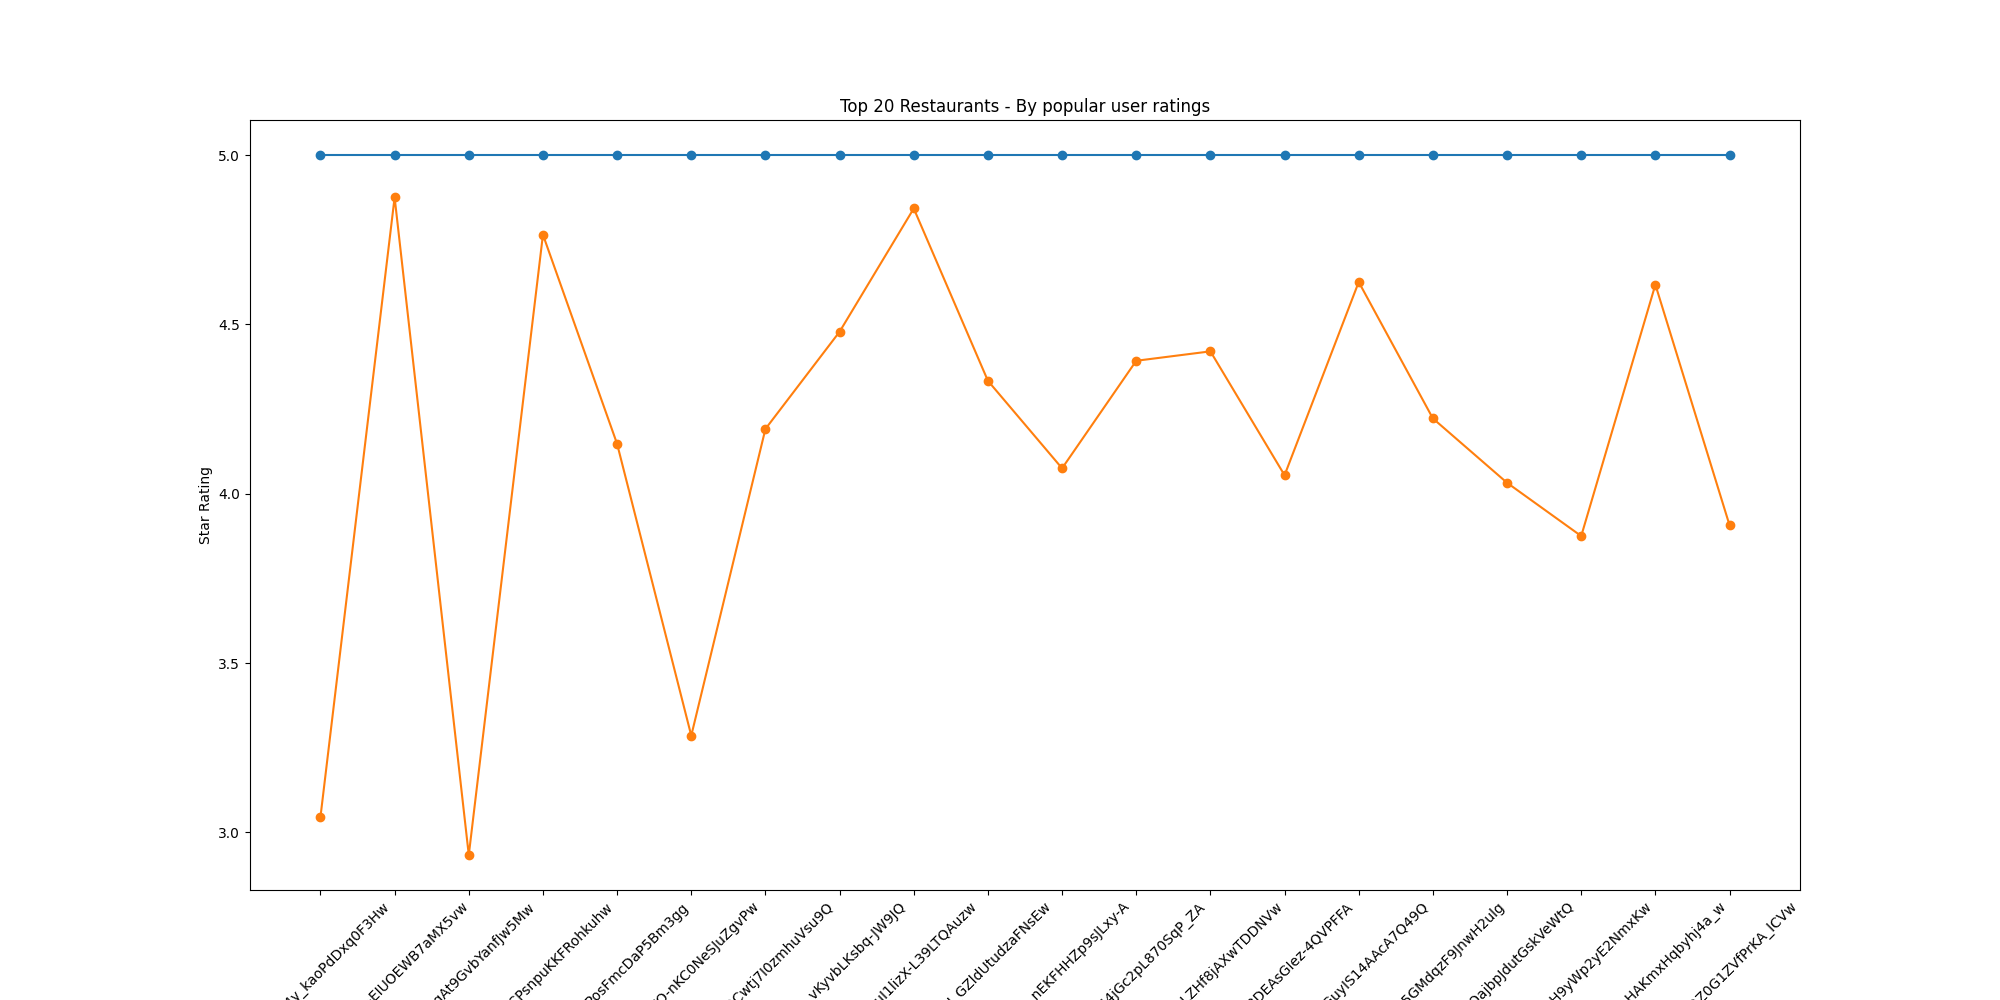

In [66]:
plt.figure(figsize=(20,10))

plt.scatter(bus_review_user_avg_pop20['business_id'], bus_review_user_avg_pop20['pop_stars'])
plt.plot(bus_review_user_avg_pop20['business_id'], bus_review_user_avg_pop20['pop_stars'])

plt.scatter(bus_review_user_avg_pop20['business_id'], bus_review_user_avg_pop20['notpop_stars'])
plt.plot(bus_review_user_avg_pop20['business_id'], bus_review_user_avg_pop20['notpop_stars'])

plt.title("Top 20 Restaurants - By popular user ratings")
plt.ylabel('Star Rating')
plt.xlabel("Business ID")
plt.xticks(rotation=45)

plt.show()
%matplot plt

## Implication

The top rated restauarants (5.0) (as rated by the popular users) have recieved lesser ratings for the same businesses by the non popular users. We can make a generalised inference that the users who have lesser number of fans tend to be more critical of the restaurant rating. 

The reason could be that they wish to be very particular in their critique and hence expect the users to follow them on Yelp.

### Scatter plot - Top 20 Restaurants - By non popular user ratings
### Overlaying the popular user ratings and notpopular user ratings of these top20

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

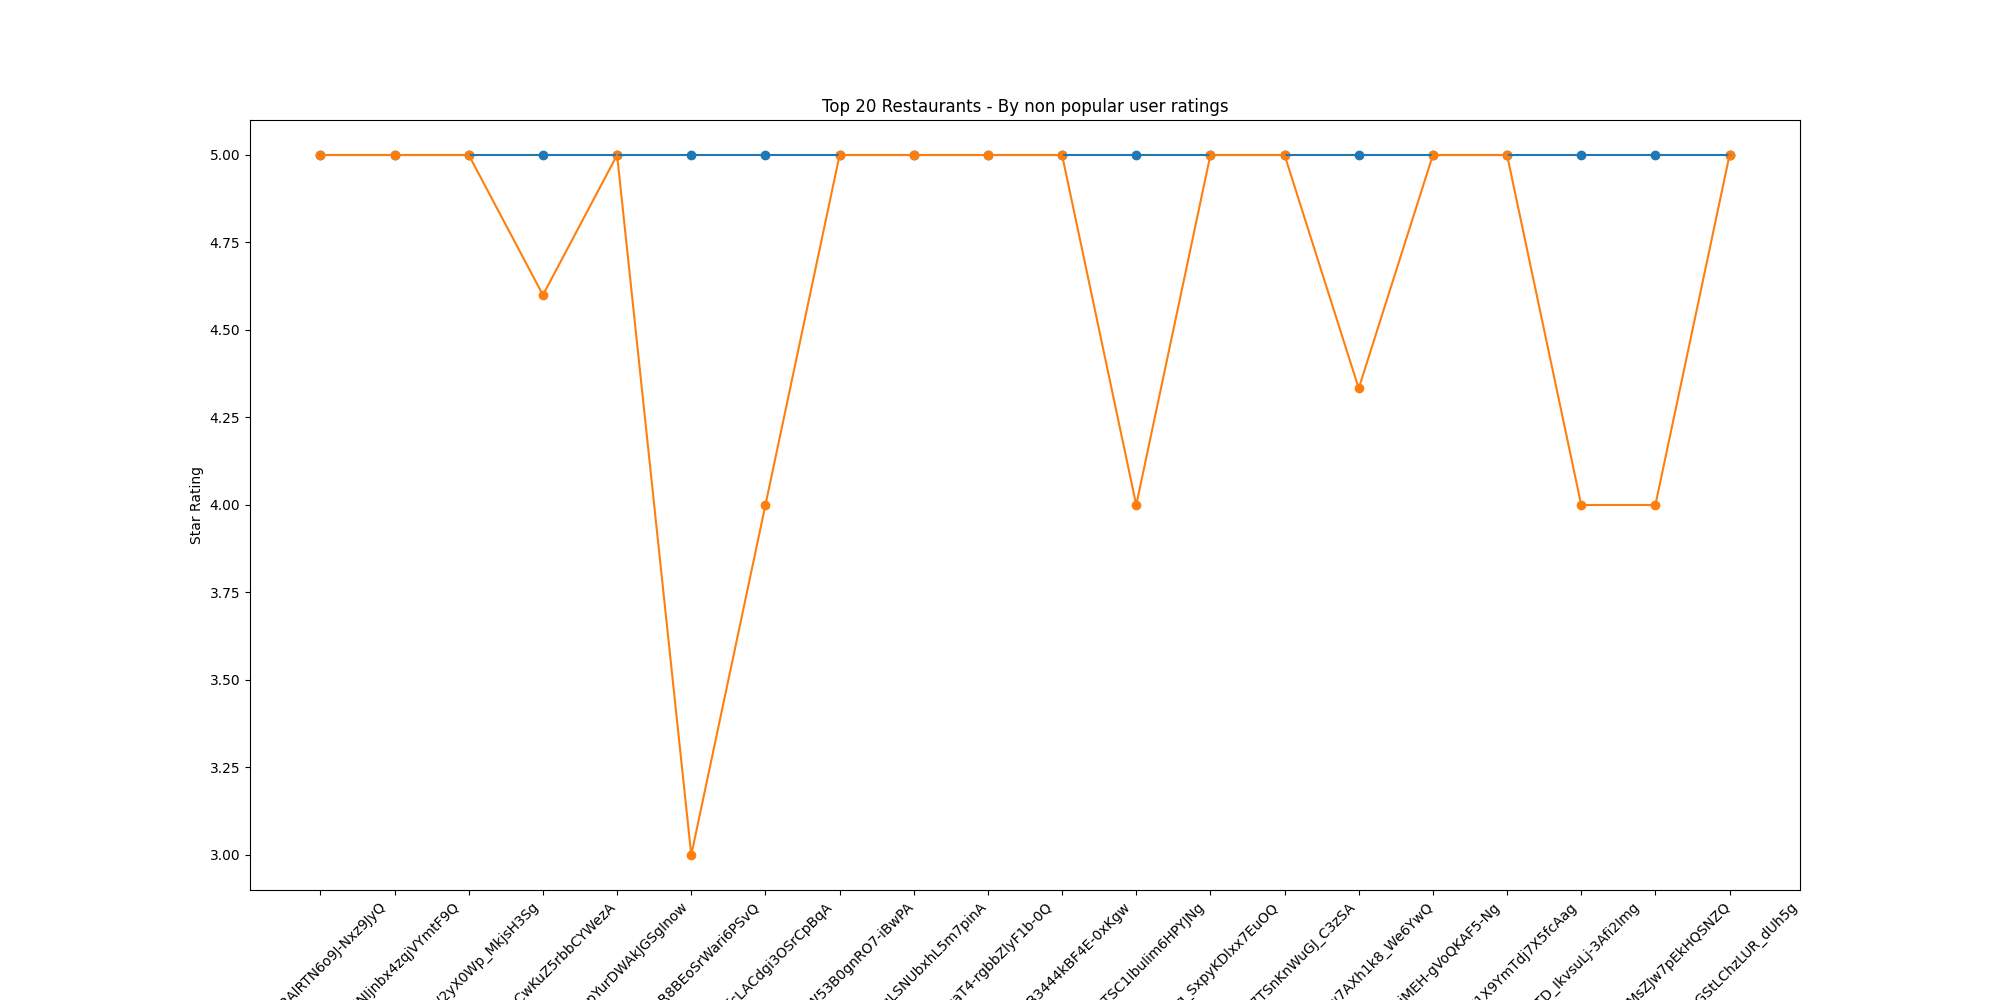

In [65]:
plt.figure(figsize=(20,10))

plt.scatter(bus_review_user_avg_notpop20['business_id'], bus_review_user_avg_notpop20['notpop_stars'])
plt.plot(bus_review_user_avg_notpop20['business_id'], bus_review_user_avg_notpop20['notpop_stars'])

plt.scatter(bus_review_user_avg_notpop20['business_id'], bus_review_user_avg_notpop20['pop_stars'])
plt.plot(bus_review_user_avg_notpop20['business_id'], bus_review_user_avg_notpop20['pop_stars'])
plt.title("Top 20 Restaurants - By non popular user ratings")
plt.ylabel('Star Rating')
plt.xlabel("Business ID")
plt.xticks(rotation=45)
plt.show()
%matplot plt

## Implication

The top rated restauarants (5.0) (as rated by the non popular users) are almost inline with the popular user ratings for those businesses.

As we made an inference that not popular users tend to be more critical, we can say that the popular users are also in agreement with their ratings.